In [1]:
import os
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
# import and "clean" data

In [3]:
def get_generator(base_dir, folderName):
    directory = os.path.join(base_dir, folderName)
    return ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory, 
        target_size, 
        batch_size= batch_size
    )

In [4]:
priming_epochs = 50
training_epochs = 3
batch_size = 5
target_width = 150
target_height = 150
target_size = (target_width, target_height)
target_shape = (target_width, target_height, 3) # 3 for color
base_dir = 'paintingsPriming'

priming_gen = get_generator(base_dir, 'priming')
train_gen = get_generator(base_dir, 'train')
test_gen = get_generator(base_dir, 'test')
validation_gen = get_generator(base_dir, 'validation')

Found 14 images belonging to 3 classes.
Found 195 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [5]:
numOfClasses = train_gen.num_classes

numOfPrimingSamples = priming_gen.n
numOfTrainSamples = train_gen.n
numOfTestSamples = test_gen.n
numOfValSamples = validation_gen.n

In [6]:
# Define model

In [7]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=target_shape))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(27, activation='relu'))
model.add(layers.Dense(numOfClasses, activation='sigmoid'))

In [8]:
# train model

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=["acc"])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               34560512  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                13851     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 84        
Total params: 34,574,447
Trainable params: 34,574,447
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit_generator(
    priming_gen,
    steps_per_epoch= numOfPrimingSamples / batch_size,
    epochs= priming_epochs
)

Epoch 1/50
3/2 [================================] - 0s 159ms/step - loss: 4.9645 - acc: 0.3571
Epoch 2/50
3/2 [================================] - 0s 75ms/step - loss: 4.8799 - acc: 0.3571
Epoch 3/50
3/2 [================================] - 0s 75ms/step - loss: 4.8799 - acc: 0.3571
Epoch 4/50
3/2 [================================] - 0s 95ms/step - loss: 4.8799 - acc: 0.3571
Epoch 5/50
3/2 [================================] - 0s 99ms/step - loss: 5.2655 - acc: 0.3571
Epoch 6/50
3/2 [================================] - 0s 98ms/step - loss: 4.8799 - acc: 0.3571
Epoch 7/50
3/2 [================================] - 0s 70ms/step - loss: 5.0727 - acc: 0.3571
Epoch 8/50
3/2 [================================] - 0s 99ms/step - loss: 5.0727 - acc: 0.3571
Epoch 9/50
3/2 [================================] - 0s 95ms/step - loss: 4.8799 - acc: 0.3571
Epoch 10/50
3/2 [================================] - 0s 66ms/step - loss: 5.2655 - acc: 0.3571
Epoch 11/50
3/2 [================================] - 0s 65

In [12]:
history = model.fit_generator(
    train_gen,
    validation_data= validation_gen,
    validation_steps= numOfValSamples / batch_size,
    steps_per_epoch= numOfTrainSamples / batch_size,
    epochs= training_epochs
)

Epoch 1/3
39/39 [==============================] - 3s 87ms/step - loss: 6.6603 - acc: 0.3333 - val_loss: 6.8631 - val_acc: 0.3333
Epoch 2/3
39/39 [==============================] - 3s 86ms/step - loss: 6.0686 - acc: 0.3179 - val_loss: 3.7781 - val_acc: 0.3333
Epoch 3/3
39/39 [==============================] - 3s 86ms/step - loss: 5.9930 - acc: 0.3231 - val_loss: 6.8631 - val_acc: 0.3333


In [13]:
model.save('priming.h5')

In [14]:
# validation

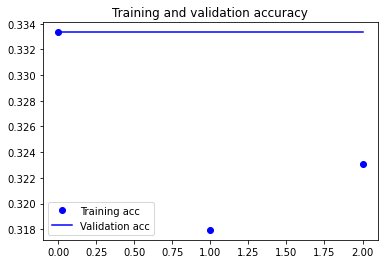

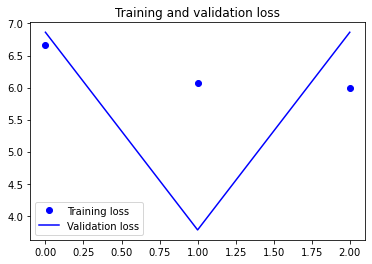

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()